---
format: pdf
jupyter: python3
---

# CNN model for Accident Detection based on the MobileNetV2 archtecture

## Table of Contents

>[CNN model for Accident Detection based on the MobileNetV2 archtecture](#scrollTo=eYuCDb7MPr2g)

>>[Set up and Definintion](#scrollTo=ezqttzyCAUr0)

>>>[Importing required packages/librarise for this project](#scrollTo=dYxwbY8GvIig)

>>>[Defining the train_test_validation_dataset  function](#scrollTo=HIi1t-JBwIJm)

>>>[Defining sample_images function](#scrollTo=wV310yUGw3nh)

>>>[Defining the show_distribution_function](#scrollTo=3FjMCtxo0A4P)

>>>[This function will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling](#scrollTo=TIoXXXQJxP_y)

>>>[Definition of the graph_accuracy_loss function](#scrollTo=irS_COEtx3vY)

>>[External Resources](#scrollTo=X4tgil15A765)

>>>[Loading Google Drive](#scrollTo=B5LqYWwLynQ7)

>>>[Setting the paths to the datsets](#scrollTo=sSZTHnPky5G4)

>>>[The feature_extractor_model](#scrollTo=4WOJZVO8Gcsc)

>>[Loading Datasets and converting them to ``tf.keras.Dataset`](#scrollTo=nhpncrpUvHJ0)

>>>[Defining Parameters](#scrollTo=KjBB7NVczIUY)

>>>[Loading the datasets](#scrollTo=WrrrL3xgIeYL)

>>>[Noramlizing the train, test and validation datasets](#scrollTo=d-_hioVJC289)

>>[Data Visualization](#scrollTo=kaSg5JR7zuYw)

>>>>[Sampling images from the training set](#scrollTo=kaSg5JR7zuYw)

>>>>[Visualizing class distribution in the train dataset](#scrollTo=tkGQPffY0rq8)

>>[Model Development and Training](#scrollTo=n6rW1PTQBUKJ)

>>>[Defining useful model parameters](#scrollTo=BooS1dt5LS4T)

>>>[Defining the pre-trained model](#scrollTo=IfNMnkeSFpV-)

>>>[Model set up](#scrollTo=aNdUMGkDJKkj)

>>>[Compiling the model](#scrollTo=UGQhcKPzJep7)

>>>[Training the model](#scrollTo=v_tWavLUKKNo)

>>[Model Evaluation](#scrollTo=ml5h9IgvO-dI)

>>>[Visualizing model performance](#scrollTo=OrFIm5p_KjAv)

>>>[Evaluation of test dataset](#scrollTo=rfjwbJzhPD9I)



## Set up and Definintion
This section covers all set ups, installations and definitions of tools for the project

### Importing required packages/librarise for this project
`numpy` for mathematical operations

`PIL` for visualizing image data

`pathlib` provides an easy way to access files in various directories

`matplotlib.pyplot` for data visualization

`tensorflow` is the deep learning framework which we use to develop and train the model

`tensorflow_hub` is the source of the MobileNetV2 pretrained model archtecture

In [1]:
import numpy as np
import PIL
import pathlib
import matplotlib.pyplot as plt
import PIL.Image
import tensorflow as tf
import tensorflow_hub as hub

### Defining the `train_test_validation_dataset`  function
This function is to help us extract image datasets for training, testing and validation respectively.

It takes in the paths to the corresponding image collections and returns the 3 datasets in `tf.keras.dataset` format

In [2]:
def train_test_validation_dataset(train_directory, test_directory, validation_directory):
    train_data = tf.keras.utils.image_dataset_from_directory(
      train_directory,
      labels='inferred',
      label_mode='int',
      class_names=None,
      color_mode='rgb',
      batch_size=batch_size,
      image_size=image_size,
      shuffle=True,
      seed=333,
      validation_split=None,
      subset=None,
      interpolation='bilinear',
      follow_links=False,
      crop_to_aspect_ratio=False,
    )

    test_data = tf.keras.utils.image_dataset_from_directory(
      test_dir,
      labels='inferred',
      label_mode='int',
      class_names=None,
      color_mode='rgb',
      batch_size=batch_size,
      image_size=image_size,
      shuffle=True,
      seed=333,
      validation_split=None,
      subset=None,
      interpolation='bilinear',
      follow_links=False,
      crop_to_aspect_ratio=False,
    )

    val_data = tf.keras.utils.image_dataset_from_directory(
      val_dir,
      labels='inferred',
      label_mode='int',
      class_names=None,
      color_mode='rgb',
      batch_size=batch_size,
      image_size=image_size,
      shuffle=True,
      seed=333,
      validation_split=None,
      subset=None,
      interpolation='bilinear',
      follow_links=False,
      crop_to_aspect_ratio=False,
    )

    return (train_data, test_data, val_data)


### Defining `sample_images` function
This function is intended to help us sample and view images from any of the dataset.

It takes in a `tf.keras.dataset` and displays sampled images from it

In [3]:
def sample_images(dataset):
  plt.figure(figsize=(10, 10))
  for images, labels in dataset.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

### Defining the `show_distribution_function`
This is to be used to visualize the distribution of classes in the datasets

In [20]:
def show_distribution(dataset):
    # Extract class names and counts
    class_names = dataset.class_names
    class_counts = np.zeros(len(class_names), dtype=np.int32)
    for images, labels in dataset:
        for label in labels:
            class_counts[label] += 1

    # Plot the distribution
    plt.bar(class_names, class_counts)
    plt.title('Image class distribution')
    plt.show()

### This function will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`

In [5]:
def normalize(dataset):
  normalization_layer = tf.keras.layers.Rescaling(1./255)
  normalized_dataset = dataset.map(lambda x, y: (normalization_layer(x), y))
  return normalized_dataset 

### Definition of the `graph_accuracy_loss` function
This function is intended to help us create plots of the loss and accuracy on the training and validation sets

In [6]:
def graph_accuracy_loss(history, epochs):
  accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']
  loss = history.history["loss"]
  validation_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize = (8,8))

  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, accuracy, label = "Training Accuracy")
  plt.plot(epochs_range, validation_accuracy, label= "Validation Accuracy")
  plt.legend(loc = "lower right")
  plt.title("Training and Validation Accuracy")

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label = "Training Loss")
  plt.plot(epochs_range, validation_loss, label= "Validation Loss")
  plt.legend(loc = "upper right")
  plt.title("Training and Validation loss")

  plt.show()

## External Resources
This part contains paths and links to external resources relevant to the project

### Loading Google Drive
The images dataset was stored in the google drive for easy access via the Google Colabotory IDE

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setting the paths to the datsets
Paths are set relative to the google drive root system

In [8]:
train_dir = 
  "/content/drive/MyDrive/Data sets/Accident_Detection_From_CCTV_Footage/data/train"
test_dir = 
  "/content/drive/MyDrive/Data sets/Accident_Detection_From_CCTV_Footage/data/test"
val_dir = 
  "/content/drive/MyDrive/Data sets/Accident_Detection_From_CCTV_Footage/data/val"

### The `feature_extractor_model`
The feature extractor of the pretrained MobileNetV2 archtecture from tensorflow hub

In [23]:
feature_extractor_model = 
  "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

## Loading Datasets and converting them to ``tf.keras.Dataset`
This is done using the already defined `train_test_validation_dataset` function

### Defining Parameters
Useful parameters while loading images and designing the model archtecture and training later

In [9]:
batch_size = 32
image_size = (224, 224)

### Loading the datasets

In [10]:
train_dataset, test_dataset, val_dataset = train_test_validation_dataset(
    train_dir, test_dir, val_dir
)
class_names = train_dataset.class_names

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


### Noramlizing the train, test and validation datasets

In [22]:
normalized_train_dataset, normalized_test_dataset, normalized_val_dataset = 
  normalize(train_dataset), normalize(test_dataset), normalize(val_dataset)

## Data Visualization
#### Sampling images from the training set

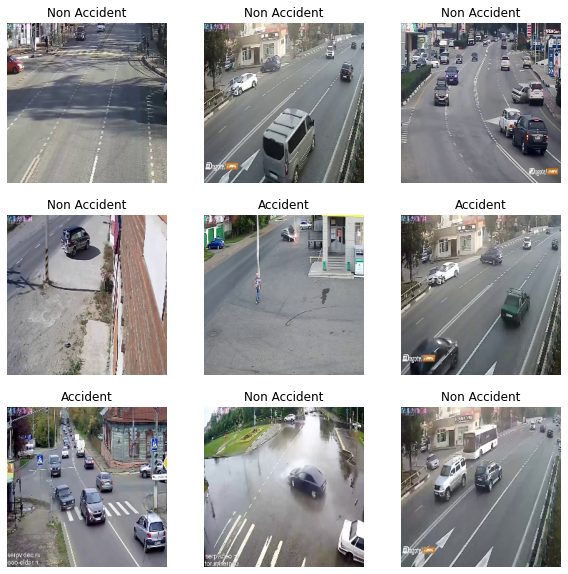

In [11]:
sample_images(train_dataset)

#### Visualizing class distribution in the train dataset 

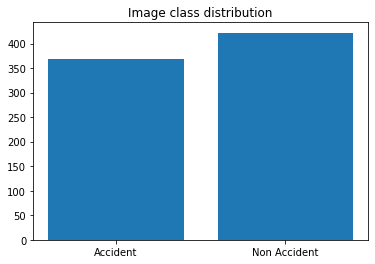

In [21]:
show_distribution(train_dataset)

## Model Development and Training
This part is where model in implemented

### Defining useful model parameters
Some parameter and hyper-parameters for the model to achieve desired performence

In [30]:
epochs = 30
activation = "relu"
optimizer = "adam"
metrics = ["accuracy"]

### Defining the pre-trained model
This is loaded without the top layer and its parameter are set to not trainable so as to avoid adjusting the already good weights

In [24]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), 
    trainable=False)

### Model set up
A sequential model is used so we can easily add layers to the pretrained model to fine tune it to the problem at hand

In [37]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(
      128, 
      activation = activation, 
      kernel_regularizer = tf.keras.regularizers.l2(0.001)
      ), 
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(class_names))
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               163968    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2,422,210
Trainable params: 164,226
Non-trainable params: 2,257,984
_________________________________________________________________


### Compiling the model
We set up the model to use Adam as optimizer and monitor accuracy and loss

The training will stop early when overfitting is detected

In [38]:
model.compile(
  optimizer=optimizer,
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=metrics)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True)

### Training the model
Training the model to fit the normalized train dataset while validating on normalized validation datase

In [39]:
hist = model.fit(
    normalized_train_dataset, 
    validation_data = normalized_val_dataset,
    epochs=epochs,
    callbacks = [early_stopping])

Epoch 1/30
25/25 [==============================] - 9s 243ms/step - loss: 0.9910 - accuracy: 0.6169 - val_loss: 0.7107 - val_accuracy: 0.7143
Epoch 2/30
25/25 [==============================] - 5s 167ms/step - loss: 0.7220 - accuracy: 0.7244 - val_loss: 0.5857 - val_accuracy: 0.8265
Epoch 3/30
25/25 [==============================] - 7s 240ms/step - loss: 0.6000 - accuracy: 0.8217 - val_loss: 0.5259 - val_accuracy: 0.8673
Epoch 4/30
25/25 [==============================] - 5s 161ms/step - loss: 0.5533 - accuracy: 0.8521 - val_loss: 0.5433 - val_accuracy: 0.8367
Epoch 5/30
25/25 [==============================] - 7s 216ms/step - loss: 0.5382 - accuracy: 0.8293 - val_loss: 0.4383 - val_accuracy: 0.8878
Epoch 6/30
25/25 [==============================] - 5s 163ms/step - loss: 0.4635 - accuracy: 0.8748 - val_loss: 0.4523 - val_accuracy: 0.8673
Epoch 7/30
25/25 [==============================] - 6s 168ms/step - loss: 0.4455 - accuracy: 0.8824 - val_loss: 0.4079 - val_accuracy: 0.8980
Epoch 

## Model Evaluation

### Visualizing model performance 
See changes in loss and accuracy for training and validation sets over the epochs

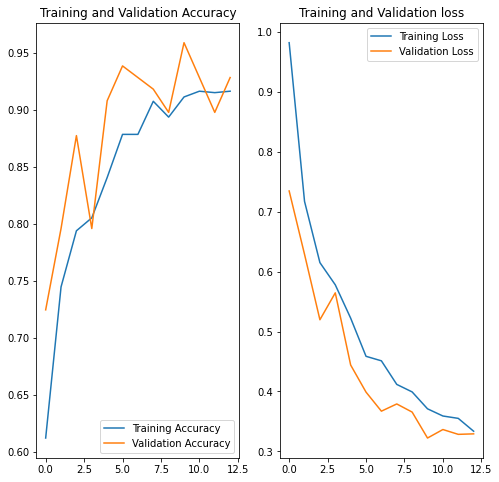

In [29]:
graph_accuracy_loss(hist, epochs)

### Evaluation of test dataset

In [40]:
model.evaluate(normalized_test_dataset)

4/4 [==============================] - 39s 141ms/step - loss: 0.2888 - accuracy: 0.9700


[0.28882908821105957, 0.9700000286102295]

## Saving the model to the **drive**

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Accident Detection/acc_modelv3.h5",)